<a href="https://colab.research.google.com/github/giocondo91/data_science_python/blob/main/Boston_housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistics for Data Science with Python**
**Jose Guilherme Giocondo**

'The Boston housing Dataset'

```The following describes the dataset variables:```

```CRIM``` per capita crime rate by town

```ZN```  proportion of residential land zoned for lots over 25,000 sq.ft.

```INDUS``` proportion of non-retail business acres per town.

```CHAS``` Charles River dummy variable (1 if tract bounds river; 0 otherwise)

```NOX ``` nitric oxides concentration (parts per 10 million)

```RM``` average number of rooms per dwelling

```AG```  proportion of owner-occupied units built prior to 1940

```DI```  weighted distances to five Boston employment centres

```RA```  index of accessibility to radial highways

```TA```  full-value property-tax rate per $10,000

```PTRATIO```  pupil-teacher ratio by town

```LS```  % lower status of the population

```MEDV``` Median value of owner-occupied homes in $10's 

In [16]:
import scipy.stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
# let's take a look into our data
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [17]:
# Describe the info of the Dataset
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


    Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

1. For the "Median value of owner-occupied homes" provide a boxplot

2. Provide a  histogram for the Charles river variable

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

5. Create a histogram for the pupil to teacher ratio variable

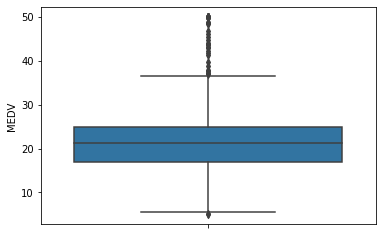

In [19]:
# For the "Median value of owner-occupied homes" provide a boxplot
boxplot_MEDV = sns.boxplot(y=boston_df["MEDV"])

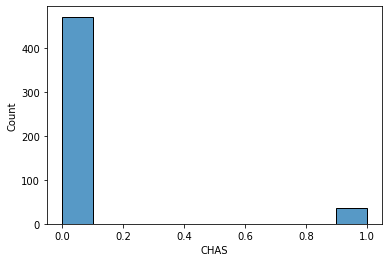

In [14]:
# Provide a histogram for the Charles river variable
hist_CHAS = sns.histplot(data=boston_df['CHAS'])

[Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable.')]

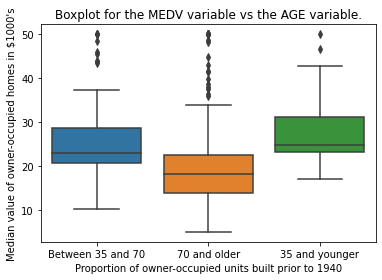

In [20]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

boxplot = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
boxplot.set(xlabel = "Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's"
           , title = "Boxplot for the MEDV variable vs the AGE variable.")

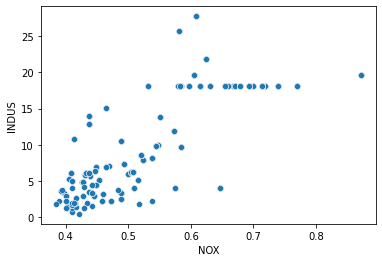

In [21]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
scat_NOX_INDUS = sns.scatterplot(data=boston_df, x="NOX", y="INDUS")

We can see a positive correlation between NOX and INDUS

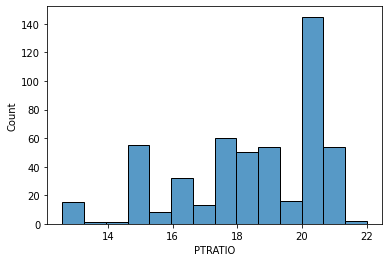

In [23]:
# Create a histogram for the pupil to teacher ratio variable
hist_PTRATIO = sns.histplot(data=boston_df['PTRATIO'])

    TASK 5
1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [30]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
levene = scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean') # Check for significance with Levene
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

In [32]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(boston_df['MEDV'], boston_df['AGE'])
print(fvalue, pvalue)

1223.1740271875933 3.20946197250671e-176


In [33]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209154, 7.913361061236894e-98)

In [46]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
X = boston_df[['MEDV']]
Y = boston_df[['DIS']]
model = LinearRegression().fit(X, Y)
model.score(X, Y)

0.06246437212178235